# Credit Card Fraud Detection Project

## Overview

This project investigated the credit card fraud detection.

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import time
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import pickle

#import geopandas as gpd

In [3]:
%%capture
#from tqdm import tqdm_notebook as tqdm
from tqdm.notebook import tqdm
tqdm().pandas()

# Data Collection

In [2]:
df = pd.read_excel('data/default_of_credit_card_clients.xls', header=1)

In [12]:
df.rename(columns={'default payment next month': 'Class'}, inplace=True)

In [14]:
df.groupby('Class').size()

Class
0    23364
1     6636
dtype: int64

In [15]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Class
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
col = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

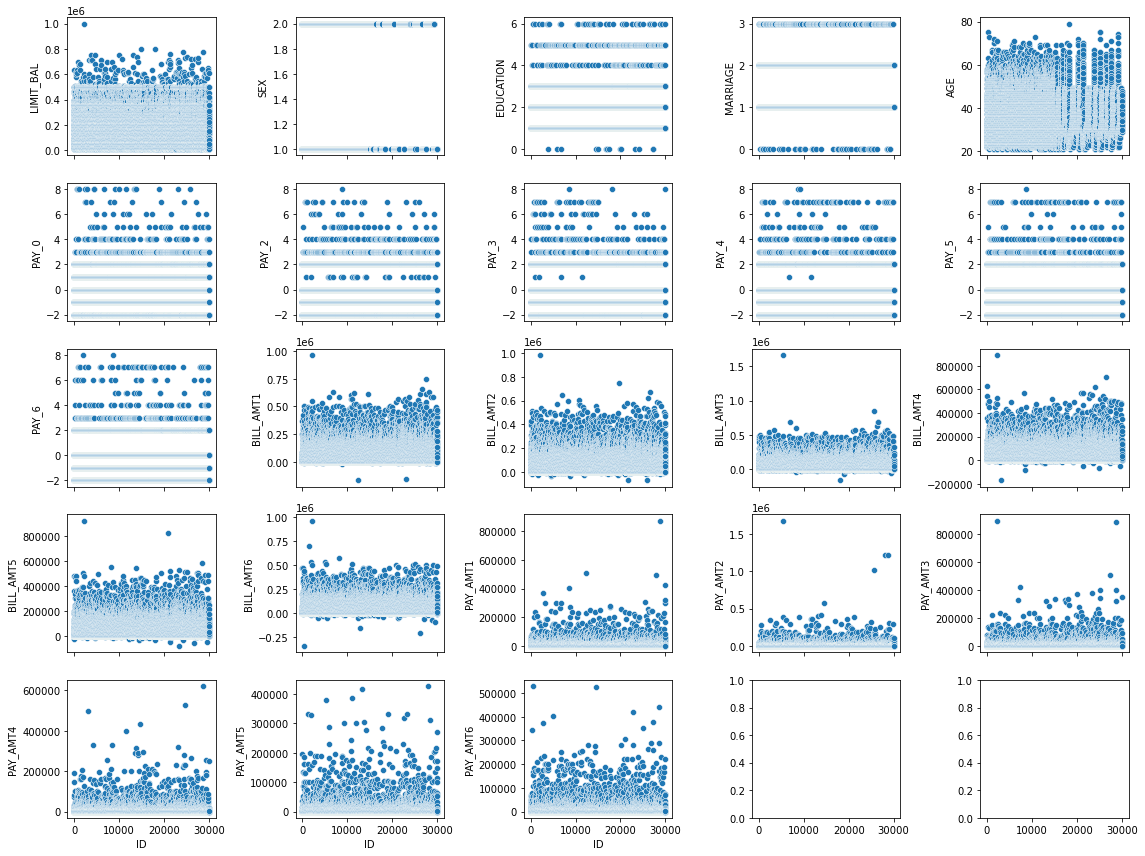

In [19]:
fig, axes = plt.subplots(5,5, sharex=True, figsize=(16,12))
for ax, c in zip(axes.flat, col):
    sns.scatterplot(data=df, x='ID', y=c, ax=ax)
plt.tight_layout()

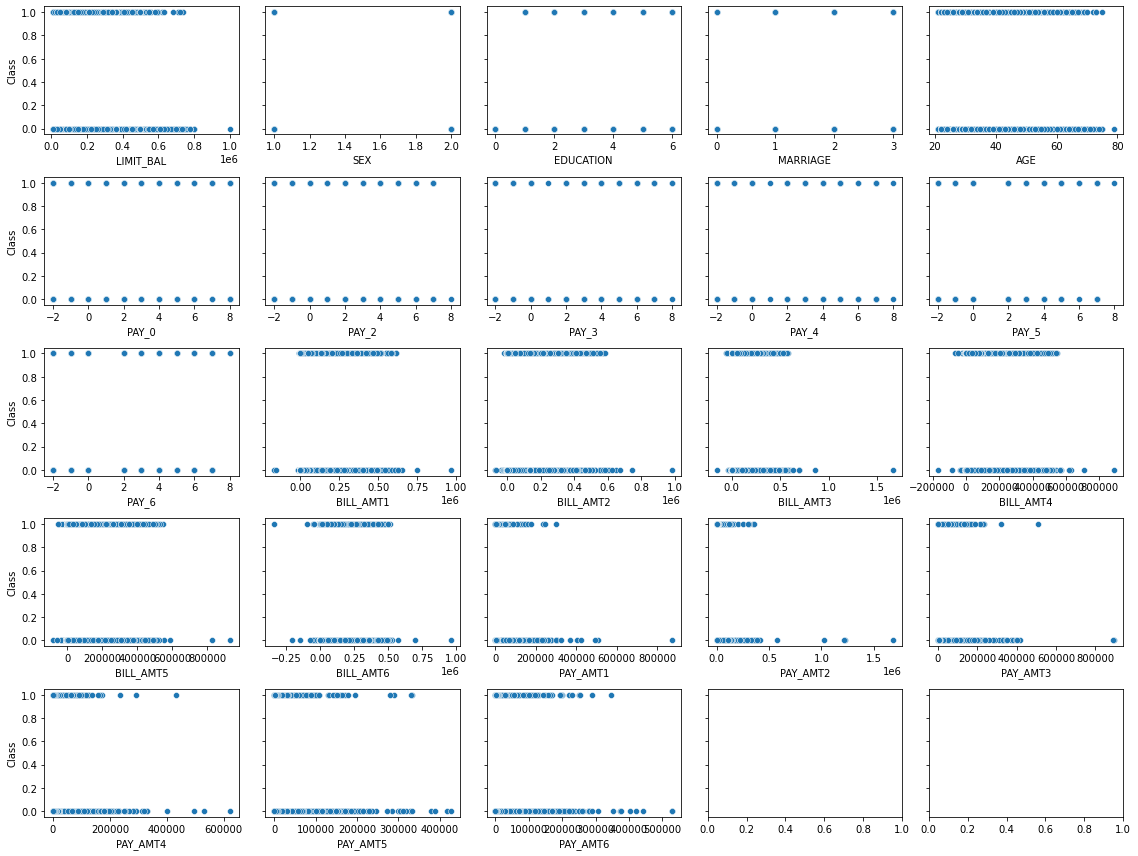

In [16]:
fig, axes = plt.subplots(5,5, sharey=True, figsize=(16,12))
for ax, c in zip(axes.flat, col):
    sns.scatterplot(data=df, x=c, y='Class', ax=ax)
plt.tight_layout()

# Data Clean and Analysis

In [20]:
X = df[col]
y = df.Class

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34)

# Modeling

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

train_pred_lr = lr.predict(X_train)
test_pred_lr = lr.predict(X_test)

/Users/mbcn345/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## K-Nearest Neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

train_pred_knn = knn.predict(X_train)
test_pred_knn = knn.predict(X_test)

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree = DecisionTreeClassifier(max_depth=4, criterion='entropy')
tree.fit(X_train, y_train)

train_pred_tree = tree.predict(X_train)
test_pred_tree = tree.predict(X_test)

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

train_pred_rf = rf.predict(X_test)
test_pred_rf = rf.predict(X_test)

## SVM 

In [33]:
from sklearn.svm import SVC

In [35]:
svm = SVC()
svm.fit(X_train, y_train)

train_pred_svm = svm.predict(X_train)
test_pred_svm = svm.predict(X_test)

## XGBoost

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
pipe = Pipeline([('ss', StandardScaler()), ('xgb', XGBClassifier())])
                 
param_grid = {'xgb__criterion': ['gini', "entropy"],    
              'xgb__learning_rate': [1],
              'xgb__max_depth': [4],
              'xgb__max_features': [None,4],
              'xgb__min_child_weight': [1, 2],
              'xgb__subsample': [0.5],
              'xgb__min_samples_split': [10],
              'xgb__min_samples_leaf': [6],
              'xgb__n_estimators': [100]}


grid_xgb = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

/Users/mbcn345/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                       

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, plot_confusion_matrix

In [45]:
print(classification_report(y_test, test_pred_lr))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5856
           1       0.00      0.00      0.00      1644

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.68      7500



In [46]:
accuracy_score(y_test, test_pred_lr)

0.7806666666666666

In [47]:
f1_score(y_test, test_pred_lr)

0.0

In [48]:
confusion_matrix(y_test, test_pred_lr)

array([[5855,    1],
       [1644,    0]])

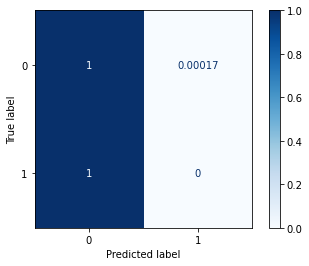

In [56]:
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, normalize='true')                              

# Visualization

# Conclusion